## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import timeit

In [2]:
df = pd.read_csv('mnist_dataset.csv')
df.head(5)

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
del df['Unnamed: 0']
df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.keys()

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [5]:
train = df.iloc[:60000]
test = df.iloc[60000:]
print("Training set has %i records" %(train.shape[0]))
print("Testing set has %i records" %(test.shape[0]))

Training set has 60000 records
Testing set has 10000 records


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [6]:
# YOUR CODE HERE
x_train, y_train = train.iloc[:,1:].values, train.iloc[:,0].values
print(x_train.shape)
print(y_train.shape)

x_test, y_test = test.iloc[:,1:].values, test.iloc[:,0].values
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
start_time = timeit.default_timer()

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

elapsed = timeit.default_timer() - start_time
print("Amount of time it took to run model: ",elapsed)

Amount of time it took to run model:  51.832770819


In [8]:
#predict value of label using classifier
prediction_validation = clf.predict(x_test)
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_validation)))

Validation Accuracy: 0.9707


In [9]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test,prediction_validation)))

Validation Confusion Matrix: 
[[ 945    0    2    0    0    1    1    0   10    0]
 [   0 1142    2    1    2    0    2    2    2    2]
 [   4    0  981    4    2    0    2    7    6    1]
 [   2    1   13  986    2   13    1    7    8    6]
 [   2    1    2    0  901    0    3    2    3   11]
 [   4    1    1   10    0  894    5    0    3    3]
 [   0    0    1    0    2    8  960    0    1    0]
 [   1    5    7    1    7    0    0 1019    2    6]
 [   1    6    4    7    2    6    3    1  914    9]
 [   5    1    2   14    9    3    2   11    9  965]]


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [10]:
# YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(0.95).fit(x_train)

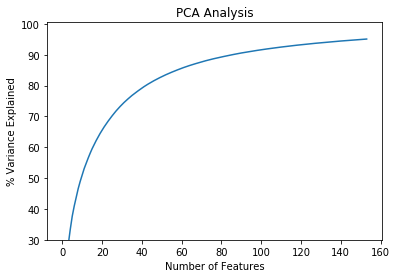

In [11]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [12]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

154 components explain 95% of the variation in data


In [13]:
pca = PCA(n_components=154, random_state = 0)
pca.fit(df)
pca_t = pca.transform(df)
print(pca_t.shape)
df_pca = pd.DataFrame(data = pca_t)

(70000, 154)


In [14]:
train = df_pca.iloc[:60000]
test = df_pca.iloc[60000:]
print("Training set has %i records" %(train.shape[0]))
print("Testing set has %i records" %(test.shape[0]))

Training set has 60000 records
Testing set has 10000 records


In [15]:
# YOUR CODE HERE
x_train, y_train = train.values, y_train
print(x_train.shape)
print(y_train.shape)

x_test, y_test = test.values, y_test
print(x_test.shape)
print(y_test.shape)

(60000, 154)
(60000,)
(10000, 154)
(10000,)


In [16]:
start_time = timeit.default_timer()

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

elapsed = timeit.default_timer() - start_time
print("Amount of time it took to run model: ",elapsed)

Amount of time it took to run model:  125.555087295


The original model had a runtime of 56.85416779600018 vs. 126.66954563000036 for the PCA one 

In [17]:
#predict value of label using classifier
prediction_validation = clf.predict(x_test)
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_validation)))

Validation Accuracy: 0.9495


The accuracy of the original model was 0.9701 vs. 0.9503 for the PCA one

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [18]:
# YOUR CODE HERE
from sklearn.manifold import TSNE

tsne_pca = TSNE(n_components=2, verbose=1, perplexity=40, n_iter = 300)

tsne_pca_result = tsne_pca.fit_transform(x_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.809s...
[t-SNE] Computed neighbors for 60000 samples in 1419.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for

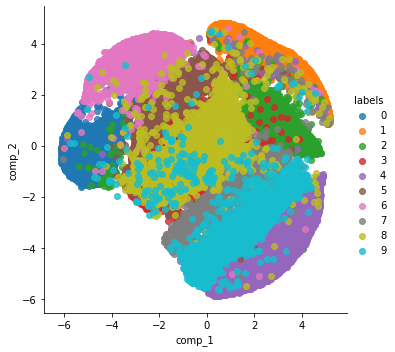

In [25]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(tsne_pca_result)
proj.columns = ["comp_1","comp_2"]
proj["labels"] = y_train

sns.lmplot("comp_1","comp_2",hue="labels", data = proj, fit_reg = False)

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [ ]:
# YOR CODE HERE
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors, n_components=2, method='standard')
x_lle = lle.fit_transform(tsne_pca_result)
print("Done. Reconstruction error: %g" % lle.reconstruction_error_)

In [ ]:
df_subset_train['LLE_std-one'] = X_lle[:,0]
df_subset_train['LLE_std-two'] = X_lle[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="LLE_std-one", y="LLE_std-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset_train,
    legend="full",
    alpha=0.3
)